# Task-4
## Spam SMS Detection
### Problem Statement
Build an AI model that can classify SMS messages as spam or legitimate.
Use techniques like TF-IDF or word embeddings with classifiers like Naive Bayes, Logistic Regression, or Support Vector
Machines to identify spam messages.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

## Loading The Dataset

In [2]:
df= pd.read_csv("spam.csv", encoding= 'ISO-8859-1', encoding_errors = 'strict')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


## Cleaning The Dataset

In [5]:
df=df.drop(df.columns[[2,3,4]], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Renaming the columns

In [6]:
df.rename(columns={'v1': 'Labels', 'v2': 'Texts'}, inplace=True)
df.head()

,Labels,Texts
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.Texts[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [8]:
df['Texts'] = df['Texts'].apply(lambda x: ' '.join(re.findall(r'[A-Za-z0-9]+', str(x))))
df['Texts'][0]

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [9]:
df.Labels=df.Labels.apply(lambda x: 1 if x=="spam" else 0)
df.head()

,Labels,Texts
0,0,Go until jurong point crazy Available only in ...
1,0,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor U c already then say
4,0,Nah I don t think he goes to usf he lives arou...


In [10]:
df.Labels=df.Labels.apply(lambda x: 1 if x=="spam" else 0)

In [11]:
df.head()

,Labels,Texts
0,0,Go until jurong point crazy Available only in ...
1,0,Ok lar Joking wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor U c already then say
4,0,Nah I don t think he goes to usf he lives arou...


## Data Visualization

In [12]:
le = LabelEncoder()
df["Labels"] = le.fit_transform(df["Labels"])

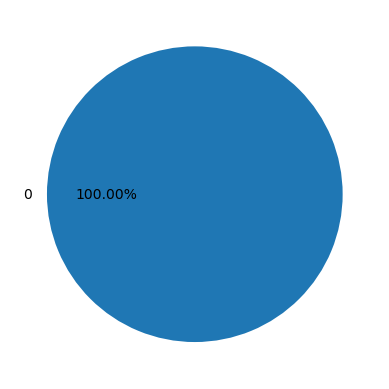

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

label_counts = df["Labels"].value_counts()

labels = label_counts.index.tolist()

plt.pie(label_counts, autopct="%.2f%%", labels=labels)

plt.show()

In [23]:
X_train, X_test, y_train, y_test=train_test_split(df.Texts, df.Labels, test_size=0.2)
X_train.shape

(4457,)

In [24]:
cv=CountVectorizer()

In [25]:
X_train_cv= cv.fit_transform(X_train.values)
X_train

2539                       Hmmm how many players selected
2416         Could you not read me my Love I answered you
2657                                 Dai lt gt naal eruku
2245    How did you find out in a way that didn t incl...
1841                               I am in your office na
                              ...                        
2394    I don t run away frm u I walk slowly amp it ki...
5096    But i m really really broke oh No amount is to...
636     Sweetheart hope you are not having that kind o...
640     Well imma definitely need to restock before th...
4670    Probably not I m almost out of gas and I get s...
Name: Texts, Length: 4457, dtype: object

## Sparse Matrix

In [26]:
X_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
X_train_cv.shape

(4457, 7617)

In [28]:
cv.get_feature_names_out()[2000:2100]

array(['cos', 'cost', 'costa', 'costing', 'costs', 'costume', 'costumes',
       'cougar', 'cough', 'coughing', 'could', 'coulda', 'couldn',
       'count', 'countin', 'countinlots', 'country', 'counts', 'coupla',
       'couple', 'courage', 'courageous', 'course', 'court', 'courtroom',
       'cousin', 'cover', 'covers', 'coz', 'cozy', 'cps', 'cr',
       'cr01327bt', 'cr9', 'crab', 'crack', 'crammed', 'cramps', 'crap',
       'crash', 'crashed', 'crave', 'craving', 'craziest', 'crazy',
       'crazyin', 'crckt', 'cream', 'created', 'creativity', 'credit',
       'credited', 'credits', 'creep', 'creepy', 'cribbs', 'cricketer',
       'crickiting', 'cried', 'crisis', 'cro1327', 'cross', 'crossing',
       'croydon', 'crucial', 'cruel', 'cruise', 'cruisin', 'crushes',
       'cry', 'crying', 'cs', 'csbcm4235wc1n3xx', 'csc', 'csh11',
       'cstore', 'ctagg', 'ctargg', 'cthen', 'ctla', 'cts', 'cttargg',
       'ctter', 'cttergg', 'ctxt', 'cuck', 'cud', 'cuddle', 'cuddled',
       'cuddli

In [29]:
X_train_np=X_train_cv.toarray()
X_train_np[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
X_train[:7]

2539                       Hmmm how many players selected
2416         Could you not read me my Love I answered you
2657                                 Dai lt gt naal eruku
2245    How did you find out in a way that didn t incl...
1841                               I am in your office na
2351    Download as many ringtones as u like no restri...
1803                     I m in class Did you get my text
Name: Texts, dtype: object

In [31]:
np.where(X_train_np[2925]!=0)

(array([3465, 5885, 6708, 7064], dtype=int64),)

In [32]:
X_train_np[2925][1661]

0

In [33]:
NB=MultinomialNB()

In [34]:
NB.fit(X_train_cv, y_train)

MultinomialNB()

In [35]:
X_test_cv= cv.transform(X_test)
y_pred=NB.predict(X_test_cv)

## Classification Report

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1115

    accuracy                           1.00      1115
   macro avg       1.00      1.00      1.00      1115
weighted avg       1.00      1.00      1.00      1115



In [37]:
print(accuracy_score(y_test, y_pred))

1.0
